<a href="https://colab.research.google.com/github/poojaga123/Projets/blob/main/Plant_leaf_disease_detection_Python_project_based_on_deep_learning_techonology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install Kaggle
!pip install -q kaggle

PLANT LEAF DISEASE DETECTION PROJECT

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poojagaga","key":"00284d824724eee2ae4931480fd75a49"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                   Wine Quality Dataset                               21KB  2022-01-15 19:15:11           6694  
prasertk/netflix-subscription-price-in-different-countries     Netflix subscription fee in different countries     3KB  2022-01-15 07:06:09           5129  
prasertk/the-best-cities-for-a-workation                       The Best Cities for a Workation                     6KB  2022-02-16 11:46:28            558  
majyhain/height-of-male-and-female-by-country-2022             Height of Male and Female by Country 2022           4KB  2022-02-02 00:40:19           2452  
sanjeetsinghnaik/top-1000-highest-grossing-movies         

In [ ]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:46<00:00, 77.0MB/s]
100% 2.70G/2.70G [00:46<00:00, 62.8MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions

In [ ]:
# EDA(exploratory data analysis)
len(os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,
                                 preprocessing_function=preprocess_input)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train=train_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",target_size=(256,256), batch_size=32)

val=val_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size=(256,256), batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img,label=train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

Pre processing images

In [ ]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/66)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


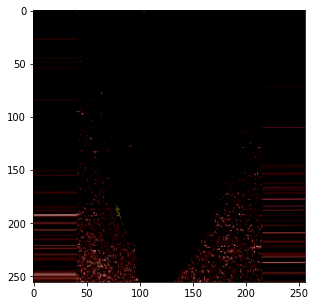

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


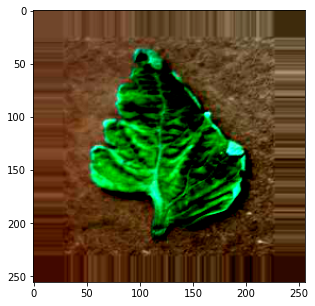

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


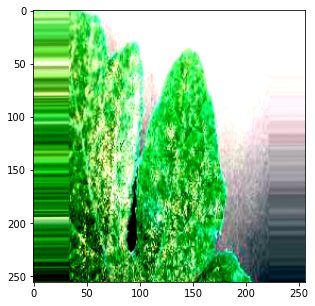

In [ ]:
plotImage(t_img[:3],label[:3])

#Building our model

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80150528/80134624 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X=Flatten()(base_model.output)
X=Dense(units=38,activation='softmax')(X)

#creating our model
model=Model(base_model.input,X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

#Early Stopping and Model Check point

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#early stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)

#model check point
mc=ModelCheckpoint(filepath="best_model.h5",
                   monitor='val_accuracy',
                   min_data=0.01,
                   patience=3,
                   verbose=1,
                   save_best_only=True)
cb=[es,mc]

Training and validation of model

In [ ]:
his=model.fit_generator(train,
                        steps_per_epoch=16,
                        epochs=50,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 28.4122 - accuracy: 0.1758
Epoch 1: val_accuracy improved from -inf to 0.37305, saving model to best_model.h5
16/16 [==============================] - 32s 1s/step - loss: 28.4122 - accuracy: 0.1758 - val_loss: 16.4079 - val_accuracy: 0.3730
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 16.4505 - accuracy: 0.3965
Epoch 2: val_accuracy improved from 0.37305 to 0.59570, saving model to best_model.h5
16/16 [==============================] - 18s 1s/step - loss: 16.4505 - accuracy: 0.3965 - val_loss: 11.5395 - val_accuracy: 0.5957
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 12.0268 - accuracy: 0.5391
Epoch 3: val_accuracy improved from 0.59570 to 0.65625, saving model to best_model.h5
16/16 [==============================] - 18s 1s/step - loss: 12.0268 - accuracy: 0.5391 - val_loss: 9.0109 - val_accuracy: 0.6562
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 

In [ ]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

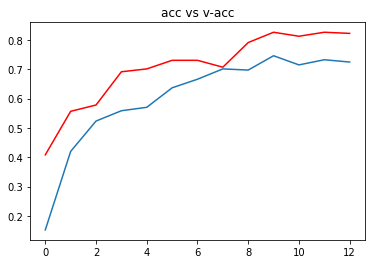

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

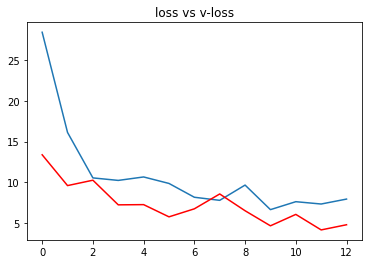

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

Load best model

In [ ]:
#load best model
from keras.models import load_model
model=load_model("/content/best_model.h5")

Check accuracy of model

In [ ]:
acc = model.evaluate_generator(val)[1]
print(f"The accuracy of your model is  = {acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of your model is  = 76.87798738479614 %


In [ ]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  print(f"the image belongs to{ref[pred]}")

In [ ]:
path="/content/test/test/AppleScab1.JPG"
prediction(path)

the image belongs toApple___Apple_scab
